## Visualization of a perceptron
#### Animated visualization of a perceptron training to be a logical AND gate

This is my take and twitch on a lab I did when studying a nanodegree course on AI programming in python.<br>
I wanted to get a better sens for whats going on so I tried to set up a debugged animation of a single perceptron model with linear activation function training to understand logical <b>AND</b>.

$\vec{h} = \phi(\vec{x}W^1)$

$\begin{bmatrix}h'_1 & h'_2 & h'_3\end{bmatrix}$ =
$\begin{bmatrix}x_{1}&x_{2}&x_{3}\dots\dots & x_n\end{bmatrix}$
$\cdot$ 
$\begin{bmatrix}W_{11}&W_{12}&W_{13}\\W_{21}&W_{22}&W_{23}\\\vdots&&\\W_{n1}&W_{n2}&W_{n3}\end{bmatrix}$


<table>
<tr><th colspan=3>Logical AND</th></tr>
<tr><td>0</td><td>0</td><td>= 0</td></tr>
<tr><td>1</td><td>0</td><td>= 0</td></tr>
<tr><td>0</td><td>1</td><td>= 0</td></tr>
<tr><td>1</td><td>1</td><td>= 1</td></tr>
</table>


In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
sns.set()
%matplotlib inline

np.random.seed(42)

In [89]:
# ground truth
# input
X = np.array([[0,0],[0,1],[1,0],[1,1]])
# output
y = np.array([0,0,0,1])

In [97]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
        return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    debug = []
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        debug.append("predicting X[{}]:{} = {}, truth: {}".format(i,X[i],y_hat,y[i]))
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b, debug
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    min_x, max_x = x_min-2.5, x_max+2.5
    min_y, max_y = y_min-2.5, y_max+2.5
    
    pline = np.arange(min_x,max_x,0.25)
    init_w = W.copy()
    init_b = b
    
    # These are the solution lines that get plotted below.
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b, debug = perceptronStep(X, y, W, b, learn_rate)
        dstr = "\n".join(debug)
        slope = -(b/W[1])/(b/W[0])  
        intercept = -b/W[1]
        abline_values = [slope * i + intercept for i in pline]  
        
        clear_output(wait=True)
        sns.swarmplot(x=X.T[0], y=X.T[1],hue=y,palette=sb.xkcd_palette(['red','blue']))
        plt.plot(pline, abline_values, '--')     
        plt.xlim(min_x,max_x)
        plt.ylim(min_y,max_y)
        
        plt.title("epoch: {:02d}\n init: [{},{}], {}\nweights: [{},{},{:10f}]\n{}".format(
            i+1,
            init_w[0],init_w[1],
            init_b,
            W[0],W[1],
            b,dstr))
        plt.show()  

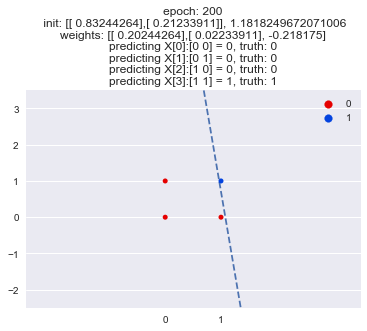

In [98]:
trainPerceptronAlgorithm(X,y,num_epochs=200, learn_rate=0.01)